In [1]:
import sumolib
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import random

import torch
import torch_geometric
import torch_geometric.data as Data
import torch_geometric.utils as pyg_utils

import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import numpy as np
import json
import sys
import import_ipynb

import copy

%run ../Codes/Data_handling.ipynb
%run ../Codes/Data_visualization.ipynb
%run ../Codes/Model.ipynb
%run ../Codes/Analysis.ipynb

300
309
50


In [13]:
G1 = read_sumo_net1('../Data/s_gyor.net.xml') # type: ignore
G2 = add_edge_features_from_xml(G1,'../Data/gyor_forg_15_min.xml',"10800.00")
with open('../Codes/dimensions.json', 'r') as file:
    edge_dims = json.load(file)

In [19]:
with open('../gnn_outputs/edges_to_hide0.8_random_5_v2.json', 'r') as file:
    edges_to_hide = json.load(file)
data_train = torch.load('../Data/data_train.pth')
data_test = torch.load('../Data/data_test.pth')

prepared_training_data, prepared_training_data_hiden, prepared_test_data, prepared_test_data_hiden, summa = data_preparation(data_train, data_test, edges_to_hide, True)


model2 = GNN(edge_dims[0], edge_dims[1], edge_dims[2], edge_dims[3], edge_dims[4], edge_dims[5], edge_dims[6], edge_dims[7], edge_dims[8])
model2.load_state_dict(torch.load('../gnn_outputs/gnn_model_ces_0.8_random_5_v2.json'))
output = model2(prepared_training_data[6].edge_attr, prepared_training_data[6].edge_index)


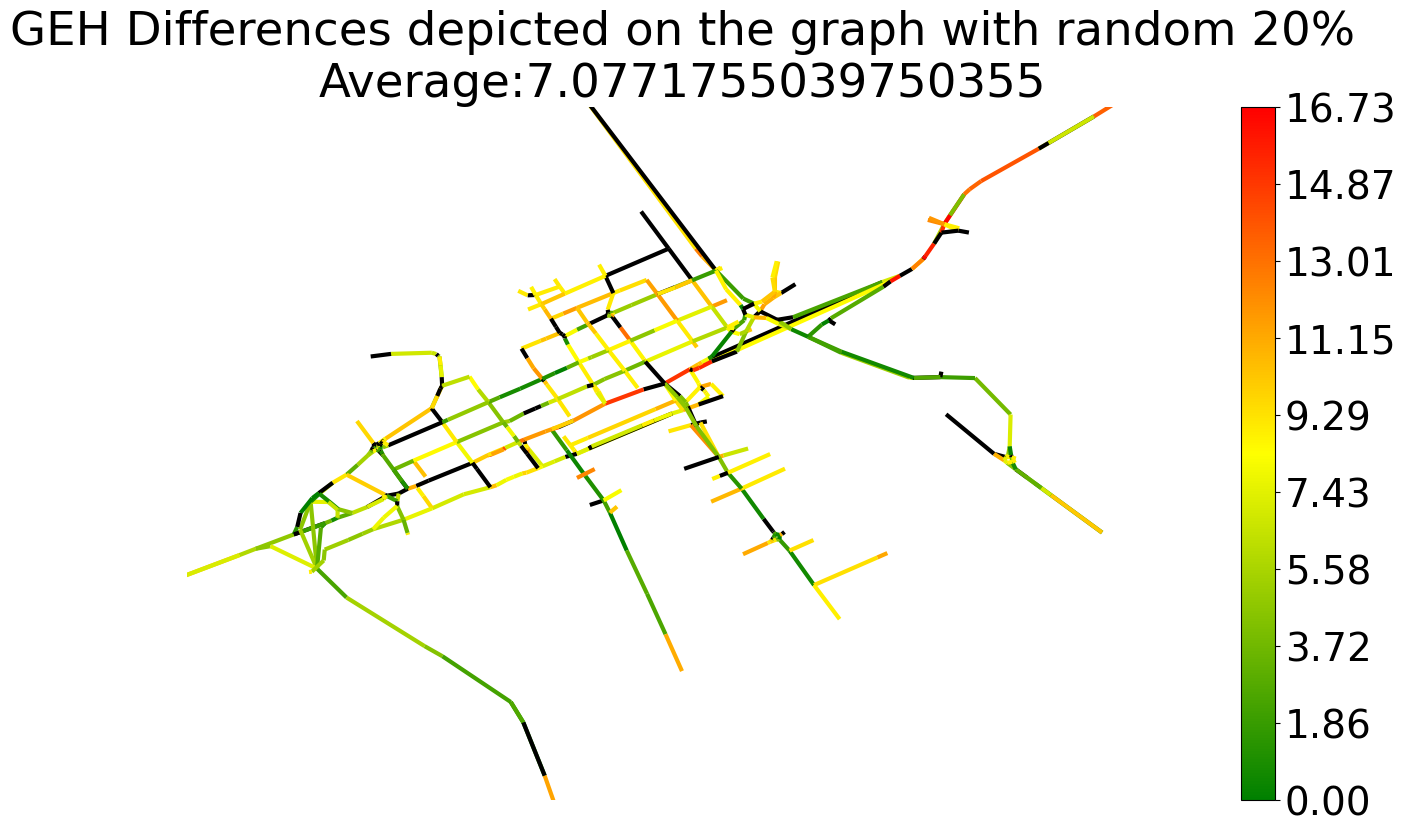

16.725458367880716

In [21]:
plot_graph_weight_GEH(G1,output,edges_to_hide, prepared_training_data[6], " random 20%")